In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import dirname as dirname
import os

In [20]:
test_name="first_test" 
data = pd.read_csv("{}.csv".format(test_name),parse_dates=['Date',])

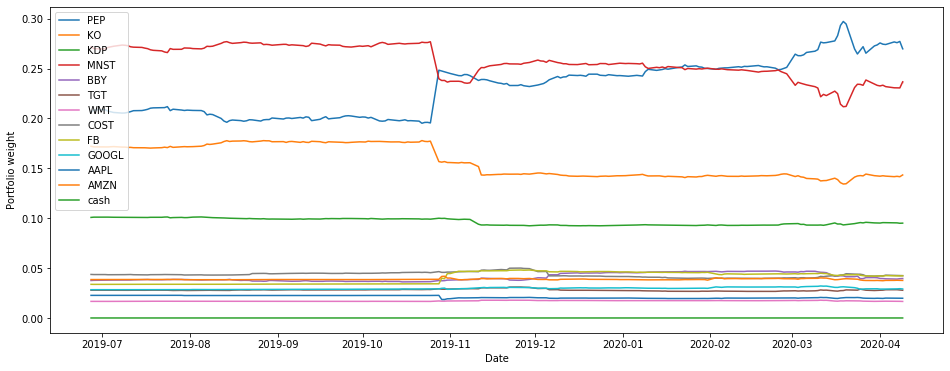

In [21]:
#tickers = ['PEP','KO','KDP','MNST','cash']
include_cash = True
tickers = data.columns[5:]
if not include_cash: tickers = tickers[:-int('cash' in tickers)]
plt.figure(figsize=(16, 6))

for ticker in tickers:
    sns.lineplot(x=data.Date,y=data[ticker])
plt.legend(tickers)
plt.ylabel("Portfolio weight")
plt.savefig("weights.png")

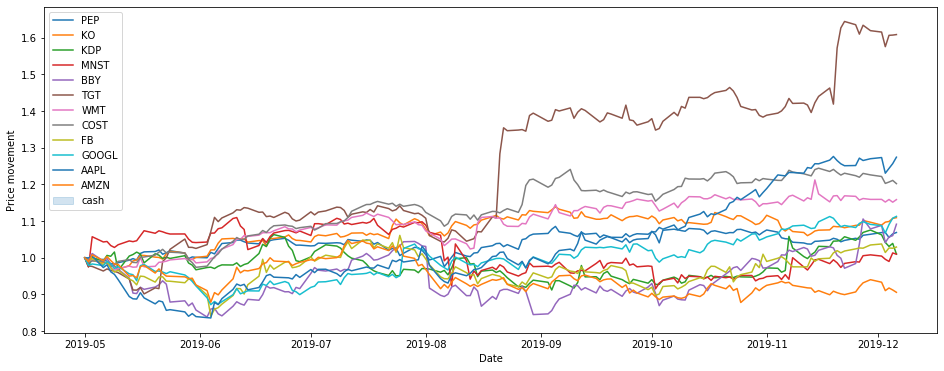

In [12]:
plt.figure(figsize=(16, 6))

for ticker in tickers[:-1]:
    path = os.path.relpath("../../../../BRIKSScreener/data/raw/prices/{}.csv".format(ticker))
    price = pd.read_csv(path,index_col=0,parse_dates=True)['open']
    price = price.loc[data.Date]
    price = price.values/price.iloc[0]
    sns.lineplot(x=data.Date,y=price)
plt.legend(tickers)
plt.ylabel("Price movement")
plt.savefig("prices.png")

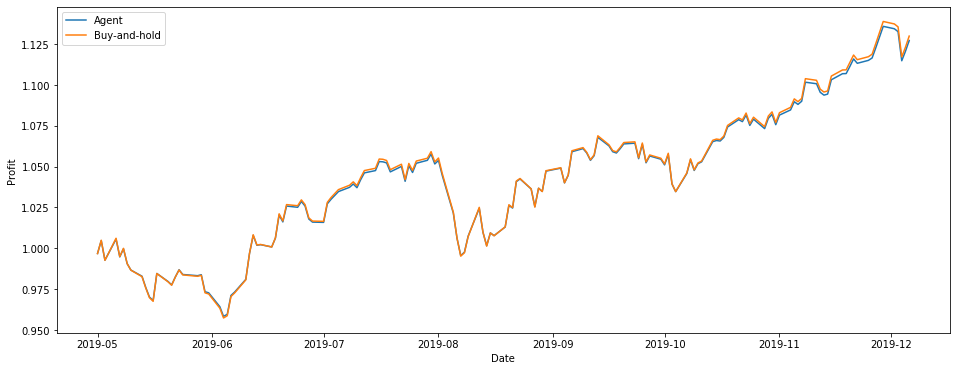

In [13]:
plt.figure(figsize=(16, 6))
for ticker in ['Profit','Base Profit']:
    sns.lineplot(x=data.Date,y=data[ticker])
plt.legend(['Agent','Buy-and-hold'])
plt.ylabel("Profit")
plt.savefig("profit.png")